# Start of Project

## Importing Libraries

In [13]:
#pip install numpy pandas sklearn more-itertools  #for downloading and installing of libraries 

In [3]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df = pd.read_csv("news.csv")      #Reading the data
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.shape  #Getting the shape of the dataset

(6335, 4)

In [6]:
df.isnull().sum()  #Checking for null or missing values

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
labels = df.label
labels.head()    #Get the labels from dataset

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [8]:
x = df['text']
y = df['label']

In [9]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [10]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train                                                                               #Split the dataset

2402    Christian Whiton is a former deputy special en...
1922    Super Tuesday Brings Harsh Light And Heartache...
3475    Prev post Page 1 of 4 Next \nNurses are among ...
6197    The deadly hostage situation at a luxury hotel...
4748    Our new country: Women and minorities hit hard...
                              ...                        
4931    Twenty-two of the 37 corporations nominated fo...
3264    As pieces of luggage, human remains, wreckage ...
1653    0 Add Comment \nIN THE immediate aftermath of ...
2607    Palestine Palestinians check the flat of Amjad...
2732    For the second week in a row, there was a temp...
Name: text, Length: 5068, dtype: object

In [12]:
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [13]:
vector = TfidfVectorizer(stop_words='english',max_df=0.7) #Initialize a TfidfVectorizer

tf_train = vector.fit_transform(x_train)              #Fit and transform train set & transform test set
tf_test = vector.transform(x_test)

In [14]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
classifier = PassiveAggressiveClassifier(max_iter=50)   #Initialize a PassiveAggressiveClassifier
classifier.fit(tf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [16]:
y_pred = classifier.predict(tf_test)               #Predict on the test set and calculate accuracy
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.45%


In [17]:
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])    #Build confusion matrix
print(cf)

[[571  44]
 [ 39 613]]


In [18]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = vector.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [19]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [20]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [21]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [22]:
# save vectorizer
filename = 'vectorizer.pkl'
pickle.dump(vector, open(filename, 'wb'))

NameError: name 'sns' is not defined

<Figure size 864x864 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

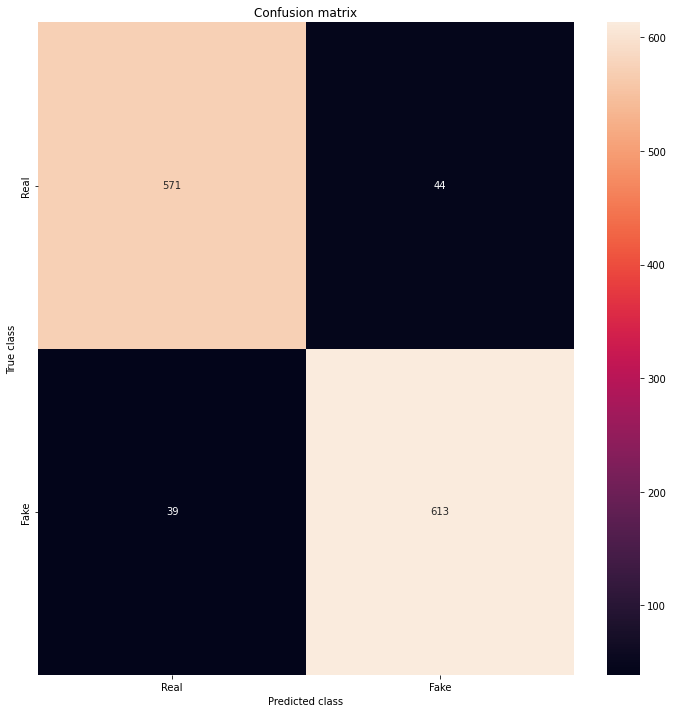

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
# printing the confusion matrix
LABELS = ['Real', 'Fake']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()